Датасет с фотографиями сухих бобов разных видов:
* `Area` – площадь бобовой зоны и количество пикселей в пределах ее границ;
* `Perimeter` – длина границы боба;
* `MajorAxisLength` – расстояние между концами самой длинной линии, которую можно провести от боба;
* `MinorAxisLength` – самая длинная линия, которую можно провести от боба, стоя перпендикулярно главной оси;
* `AspectRatio` – соотношение между длиной главной оси и длиной малой оси;
* `Eccentricity` – эксцентриситет эллипса, имеющий те же моменты, что и область;
* `ConvexArea` – кол-во пикселей в наименьшем выпуклом многоугольнике, который может содержать площадь зернышка фасоли;
* `EquivDiameter` – эквивалентный диаметр: диаметр круга, площадь которого равна площади семян фасоли;
* `Extent` – отношение пикселей в ограничивающем прямоугольнике к области фасоли;
* `Solidity` – выпуклость, отношение пикселей в выпуклой оболочке к пикселям в зернах.




In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn import metrics
# for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
# for machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, decomposition
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.neighbors import NearestNeighbors

In [ ]:
#Подготовка датасета
dry_beans = fetch_ucirepo(id=602)

X = dry_beans.data.features
cols_for_clusters = list(X.columns)
vals = dry_beans.data.targets['Class'].unique()  # Массив значений целевой переменной
df = X[cols_for_clusters].copy()
X = df
y = dry_beans.data.targets['Class'].replace(vals, [0, 1, 2, 3, 4, 5, 6])
yvals = dry_beans.data.targets['Class']
X.head()

<ipython-input-3-de998d9cef2e>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dry_beans.data.targets['Class'].replace(vals, [0, 1, 2, 3, 4, 5, 6])


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


# Линейные методы уменьшения размерности (Linear Dimensionality Reduction Methods)

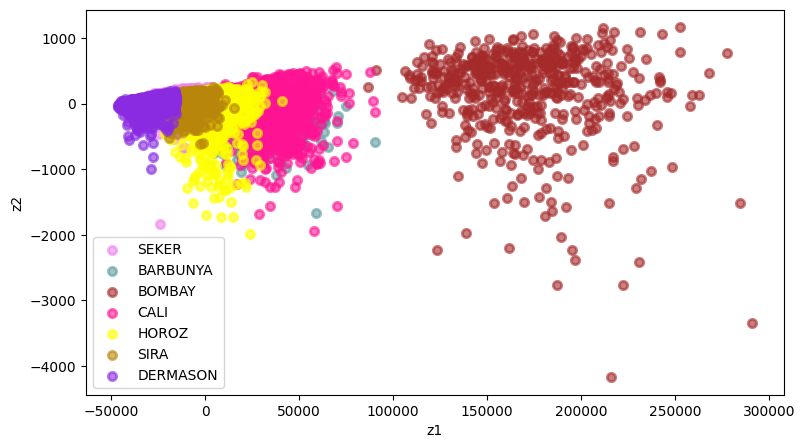

In [ ]:
#Метод главных компонентов (Principal Component Analysis, PCA)
pca = PCA(n_components=6)
X_new = pca.fit(X).transform(X)

plt.figure(figsize=(9,5))
colors = ['violet', 'cadetblue', 'brown', 'deeppink', 'yellow', 'darkgoldenrod', 'blueviolet']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.6, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([9.99967207e-01, 3.06176794e-05, 1.92111562e-06, 2.29430254e-07,
       2.46998550e-08, 3.57263342e-10])

Первые главные компоненты сохраняют 99% дисперсии набора данных,
тогда как вторые главные компоненты сохраняют только 0,00003% дисперсии.
Это указывает на то, что мы, скорее всего, получим хороший результат,
если ещё больше уменьшим размерность.

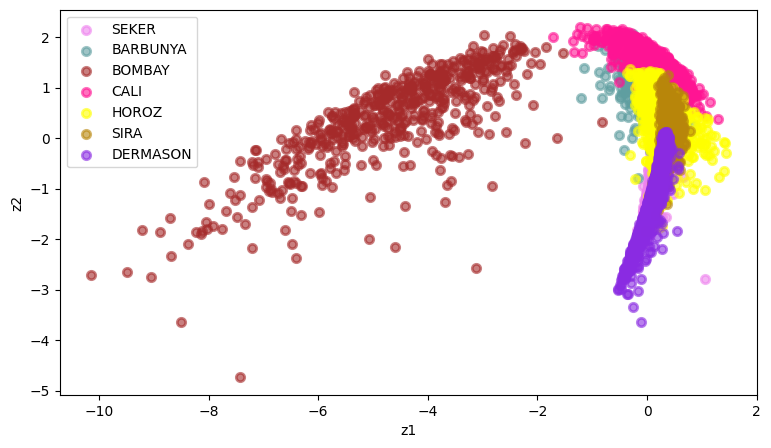

In [ ]:
#Независисый анализ компонентов (Independent Component Analysis, ICA)
fast_ica = FastICA(n_components=6)
X_new = fast_ica.fit_transform(X)

plt.figure(figsize=(9,5))
colors = ['violet', 'cadetblue', 'brown', 'deeppink', 'yellow', 'darkgoldenrod', 'blueviolet']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.6, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

В отличие от PCA, ICA стремится максимально разделить компоненты данных, которые статистически независимы. Это может привести к улучшению разделимости кластеров по сравнению с PCA.

#Нелинейные методы уменьшения размерности

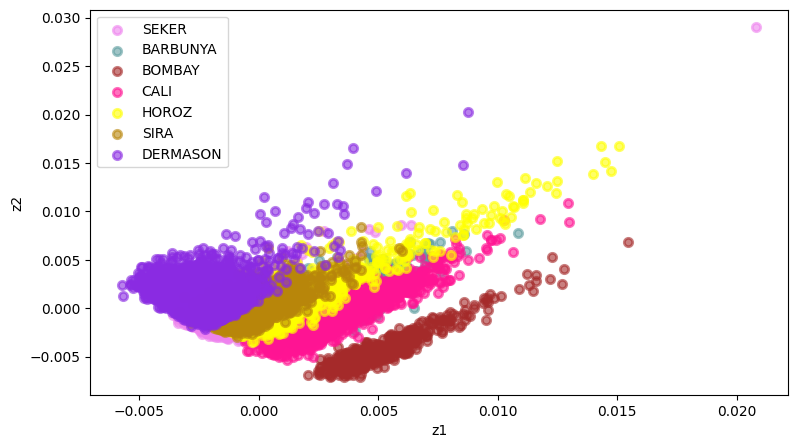

In [ ]:
#Kernel PCA
rbf_pca = KernelPCA(n_components=6, kernel='cosine', gamma=0.04)
X_new = rbf_pca.fit_transform(X)
plt.figure(figsize=(9,5))
colors = ['violet', 'cadetblue', 'brown', 'deeppink', 'yellow', 'darkgoldenrod', 'blueviolet']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.6, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

KernelPCA должен быть эффективнее обычного PCA, но в данном случае чёткого разделения не происходит.

In [ ]:
#tSNE
tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('№ of iterations: ', tsne.n_iter_)

Initial Shape of X:  (13611, 16)
New Shape of X:  (13611, 2)
Kullback-Leibler divergence after optimization:  0.5594438910484314
№ of iterations:  999


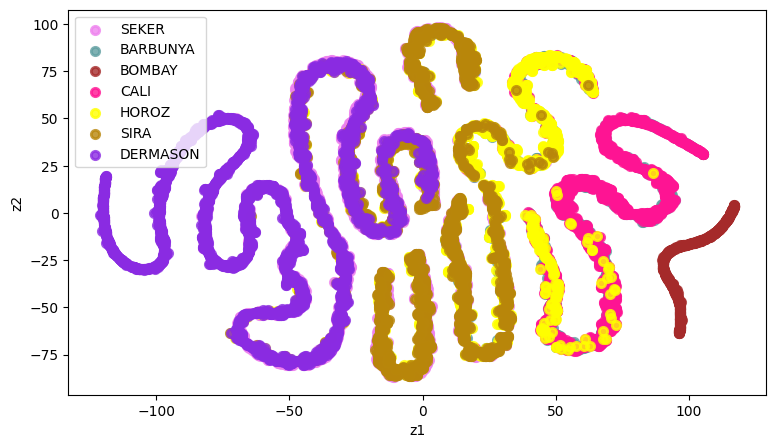

In [ ]:
plt.figure(figsize=(9,5))
colors = ['violet', 'cadetblue', 'brown', 'deeppink', 'yellow', 'darkgoldenrod', 'blueviolet']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Метод t-SNE позволяет значительно улучшить визуализацию и разделение классов в датасете по сравнению с линейными методами уменьшения размерности.

In [ ]:
#DBSCAN
dbscan_cluster1 = DBSCAN(eps=2500, min_samples=12)#eps = 150, min_samples = 80)
X_new = dbscan_cluster1.fit(X)

labels=dbscan_cluster1.labels_ # Количество кластеров
N_clus=len(set(labels))-(1 if -1 in labels else 0)
n_noise = list(dbscan_cluster1.labels_).count(-1) #шумноватое
print('Estimated № of clusters: %d' % N_clus)
print('Estimated № of noise points: %d' % n_noise)
print('v_measure =', v_measure_score(y, labels)) # Подсчёт

Estimated № of clusters: 3
Estimated № of noise points: 69
v_measure = 0.15963539318887868


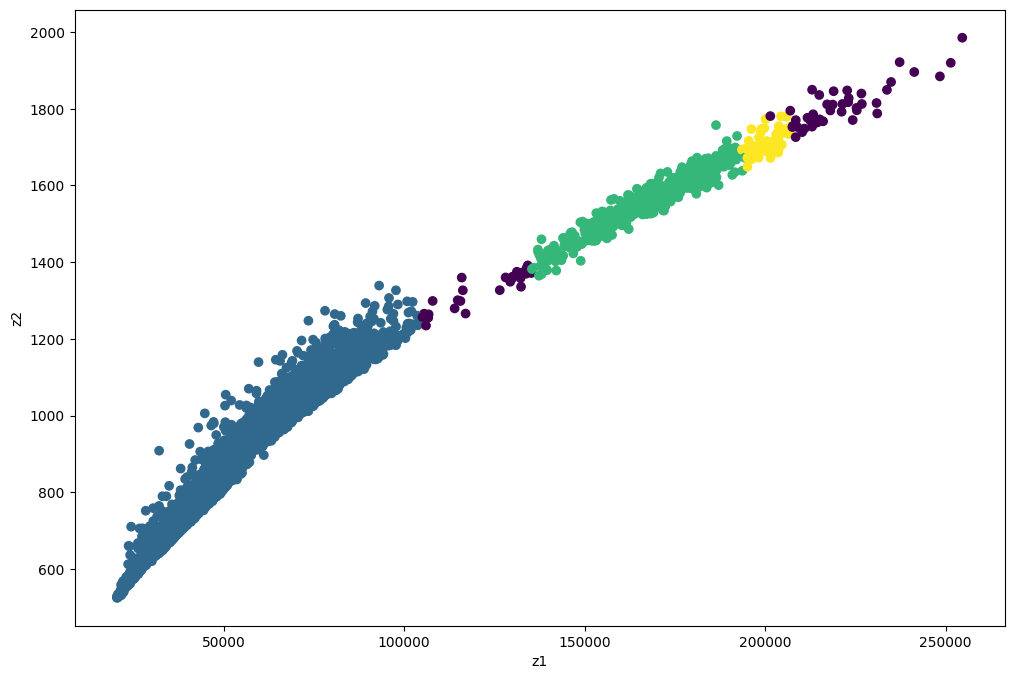

In [ ]:
plt.figure(figsize=(12,8))
colors = ['violet', 'cadetblue', 'brown', 'deeppink', 'yellow', 'darkgoldenrod', 'blueviolet']
lw = 2

plt.scatter(
        X[cols_for_clusters[0]], X[cols_for_clusters[1]],c=dbscan_cluster1.labels_
    )
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Метод DBSCAN эффективно выявил четыре отдельных кластера в датасете. Кластеры хорошо разделены и компактны, что свидетельствует о высокой плотности точек данных внутри каждого кластера.

In [ ]:
import sklearn
min_samples = 12
knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)
dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

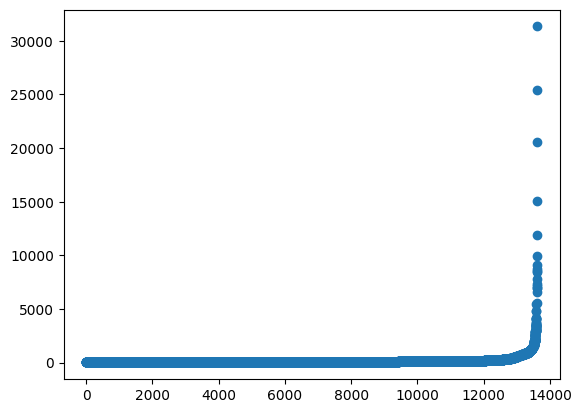

In [ ]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

График демонстрирует, что большинство точек данных в датасете имеют малые средние расстояния до ближайших соседей, что указывает на высокую плотность данных в этих областях. Однако наличие резкого роста расстояний указывает на наличие выбросов или шума в данных.

In [ ]:
#DBSCAN для определения выбросов
dbscan = DBSCAN(eps = 13000, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=13000, min_samples=12)


In [ ]:
pred = dbscan.fit_predict(X)
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated № of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated № of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated № of clusters: 2
Estimated № of noise points: 4
v_measure = 0.16135980897735555


In [ ]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных
anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

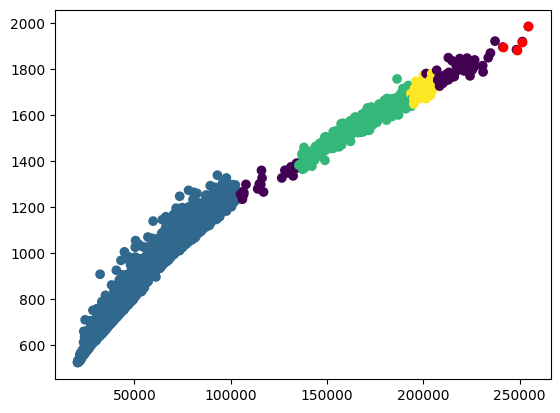

In [ ]:
plt.scatter( X[cols_for_clusters[0]], X[cols_for_clusters[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols_for_clusters[0]], values[cols_for_clusters[1]], color='r')
plt.show()

Выбросы, обозначенные красными точками, находятся значительно дальше от основной массы данных, что указывает на их отличие от основных кластеров.